# arXiv Literature Clustering

## Load Data
- Monitor GPU usage: ```watch -n 0.5 nvidia-smi```
- Headless Run Notebook: ```jupyter nbconvert --to notebook --execute arxiv_clustering.ipynb --output=arxiv_clustering_OUT.ipynb --ExecutePreprocessor.timeout=-1```

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json

In [3]:
import json
data  = []
with open("data/arxiv-metadata-oai-snapshot-2020-08-14.json", 'r') as f:
    for line in f: 
        data.append(json.loads(line))

In [4]:
data[0]

{'id': '0704.0001',
 'submitter': 'Pavel Nadolsky',
 'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
 'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
 'comments': '37 pages, 15 figures; published version',
 'journal-ref': 'Phys.Rev.D76:013009,2007',
 'doi': '10.1103/PhysRevD.76.013009',
 'report-no': 'ANL-HEP-PR-07-12',
 'categories': 'hep-ph',
 'license': None,
 'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from th

In [9]:
dict_ = {'abstract': [], 'authors': [], 'title': [], 'doi':[]}
for paper in data:
    dict_['title'].append(paper['title'])
    dict_['authors'].append(paper['authors'])
    dict_['abstract'].append(paper['abstract'])
    dict_['doi'].append(paper['doi'])

df = pd.DataFrame(dict_, columns=['title', 'authors', 'abstract','doi'])
df.head(20)

,title,authors,abstract,doi
0,Calculation of prompt diphoton production cros...,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",A fully differential calculation in perturba...,10.1103/PhysRevD.76.013009
1,Sparsity-certifying Graph Decompositions,Ileana Streinu and Louis Theran,"We describe a new algorithm, the $(k,\ell)$-...",None
2,The evolution of the Earth-Moon system based o...,Hongjun Pan,The evolution of Earth-Moon system is descri...,None
3,A determinant of Stirling cycle numbers counts...,David Callan,We show that a determinant of Stirling cycle...,None
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,Wael Abu-Shammala and Alberto Torchinsky,In this paper we show how to compute the $\L...,None
5,Bosonic characters of atomic Cooper pairs acro...,Y. H. Pong and C. K. Law,We study the two-particle wave function of p...,10.1103/PhysRevA.75.043613
6,Polymer Quantum Mechanics and its Continuum Limit,"Alejandro Corichi, Tatjana Vukasinac and Jose ...",A rather non-standard quantum representation...,10.1103/PhysRevD.76.044016
7,Numerical solution of shock and ramp compressi...,Damian C. Swift,A general formulation was developed to repre...,10.1063/1.2975338
8,"The Spitzer c2d Survey of Large, Nearby, Inste...","Paul Harvey, Bruno Merin, Tracy L. Huard, Luis...",We discuss the results from the combined IRA...,10.1086/518646
9,"Partial cubes: structures, characterizations, ...",Sergei Ovchinnikov,Partial cubes are isometric subgraphs of hyp...,None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747307 entries, 0 to 1747306
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   title     object
 1   authors   object
 2   abstract  object
dtypes: object(3)
memory usage: 40.0+ MB


In [6]:
len(df)

1747307

## Parse

In [7]:
#NLP 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [8]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['mostly',
 'whither',
 'nowhere',
 '‘ve',
 'myself',
 'somewhere',
 'itself',
 'their',
 'always',
 'move']

In [9]:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [10]:
# Parser
parser = spacy.load("en_core_web_sm")
parser.max_length = 7000000

def call_tokenizer(df):
    df["processed_abstract"] = df["abstract"].apply(spacy_tokenizer)
    return df

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [11]:
from multiprocessing import  Pool

def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [12]:
%time df = parallelize_dataframe(df=df, func=call_tokenizer, n_cores=50)

CPU times: user 5.63 s, sys: 9.28 s, total: 14.9 s
Wall time: 45min 26s


### Save

In [13]:
import pickle

pickle.dump(df, open("arxiv.p", "wb" ))

## Vectorize

In [14]:
import pickle

df = pickle.load(open("arxiv.p", "rb"))
df = df.sample(600000)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [16]:
text = df['processed_abstract'].values
%time X = vectorize(text, 2 ** 12)
X.shape

CPU times: user 22.4 s, sys: 309 ms, total: 22.7 s
Wall time: 22.7 s


(600000, 4096)

## Cluster

In [17]:
from sklearn.cluster import KMeans

In [18]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
%time y_pred = kmeans.fit_predict(X)
df['y'] = y_pred

/home/maksim/anaconda3/envs/tsnegpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


CPU times: user 2h 21min 28s, sys: 14.2 s, total: 2h 21min 42s
Wall time: 3min 25s


In [19]:
pickle.dump(df, open("arxiv.p", "wb" ))

## Libraries for Plotting

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## TSNE GPU

First reduce noise using PCA by extracting the first 20 principle components:

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, random_state=42)
%time X_embedded_pca= pca.fit_transform(X.toarray())
X_embedded_pca.shape

CPU times: user 35min 47s, sys: 9min 58s, total: 45min 45s
Wall time: 1min 1s


(600000, 20)

In [22]:
from tsnecuda import TSNE

%time X_embedded_tsne = TSNE(n_components=2, learning_rate=30, n_iter=500000, verbose=1).fit_transform(X_embedded_pca)

CPU times: user 52min 10s, sys: 2.13 s, total: 52min 12s
Wall time: 52min 8s


In [23]:
df['x_tsne'] = X_embedded_tsne[:,0] 
df['y_tsne'] = X_embedded_tsne[:,1]

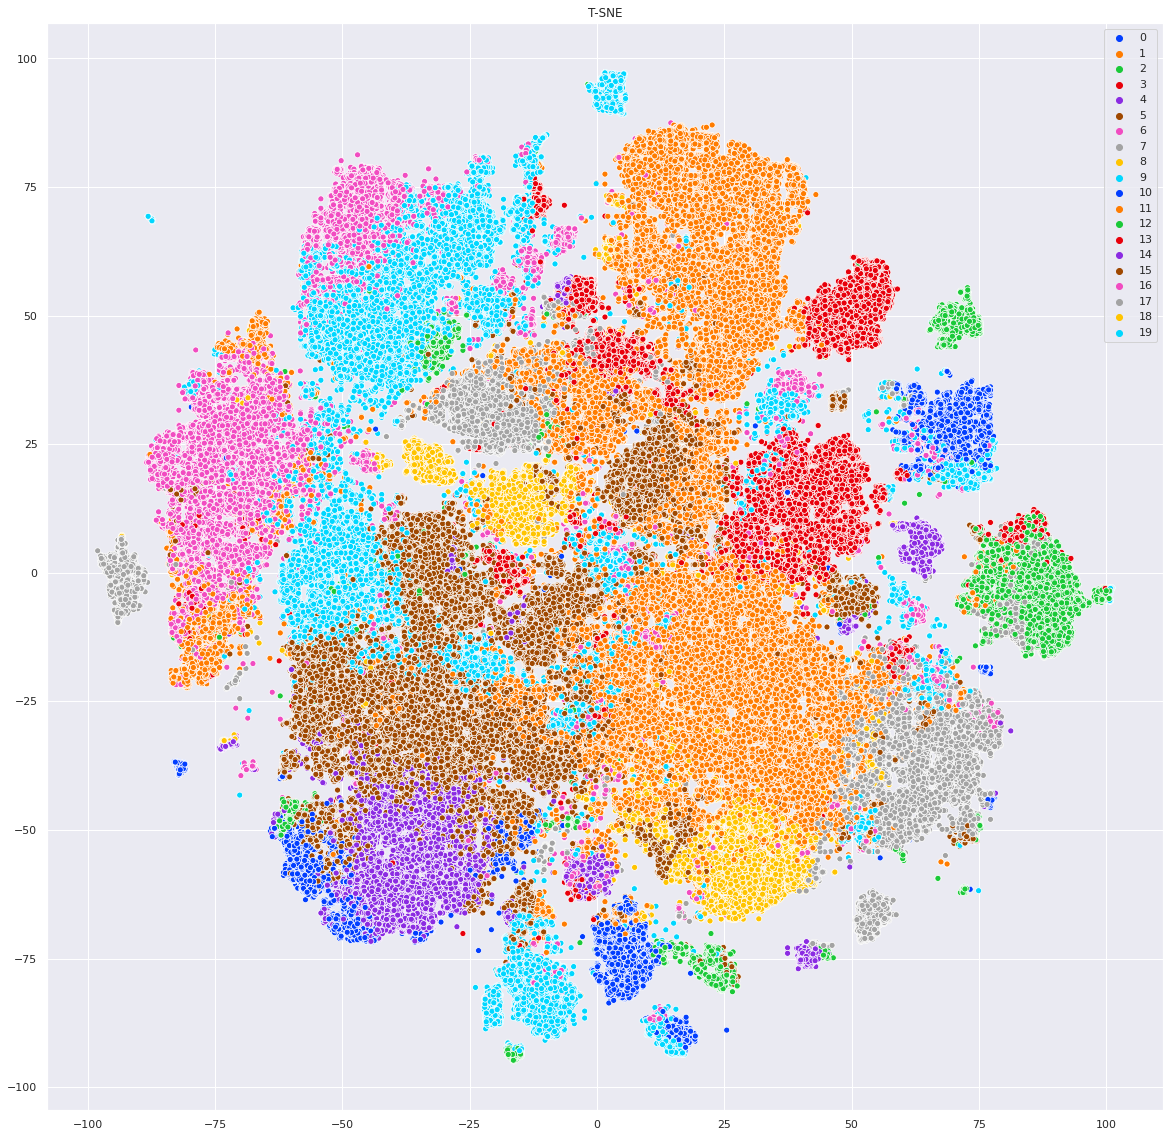

In [24]:
# sns settings
sns.set(rc={'figure.figsize':(20,20)})

# plot
sns.scatterplot(X_embedded_tsne[:,0], X_embedded_tsne[:,1], hue=list(df['y']), legend='full', palette="bright")
plt.title('T-SNE')
plt.savefig("plots/arxiv_TSNE.png", dpi=400)
plt.show()

### Save

In [25]:
pickle.dump(df, open("arxiv.p", "wb" ))

# Multicore T-SNE

```
from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_jobs=55, perplexity=100, random_state=42)
X_embedded_tsne = tsne.fit_transform(X.toarray())
```

```
df['x_tsne'] = X_embedded_tsne[:,0] 
df['y_tsne'] = X_embedded_tsne[:,1]
```

```
# sns settings
sns.set(rc={'figure.figsize':(20,20)})

# plot
sns.scatterplot(X_embedded_tsne[:,0], X_embedded_tsne[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('T-SNE')
plt.savefig("plots/arxiv_TSNE.png", dpi=600)
plt.show()
```

### Save

```
pickle.dump(df, open("arxiv_2.p", "wb" ))
```